In [ ]:
pip install aif360['all']

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 58.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd


In [ ]:
new_data = pd.read_csv("/content/final_data.csv")

In [ ]:
new_data.head()

,derived_race,derived_sex,derived_ethnicity,applicant_age_above_62,income,applicant_credit_score_type,loan_amount,loan_to_value_ratio,loan_term,occupancy_type,...,construction_method,manufactured_home_secured_property_type,manufactured_home_land_property_interest,total_units,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,loan_approved,age_cat,dti_clean
0,White,Joint,Not Hispanic or Latino,No,35.0,1,25000.0,55.58,361,3,...,1,3,5,0,153,5125,5894,0,2,65
1,White,Male,Not Hispanic or Latino,No,199.0,1,95000.0,77.34,361,1,...,1,3,5,0,216,1334,1496,0,1,55
2,White,Male,Hispanic or Latino,No,130.0,1,25000.0,76.59,361,1,...,1,3,5,0,35,268,1100,0,0,55
3,Black or African American,Male,Not Hispanic or Latino,Yes,41.0,1,65000.0,46.15,361,1,...,1,3,5,0,56,1255,2213,0,4,55
4,White,Male,Not Hispanic or Latino,No,91.0,1,125000.0,46.50,361,1,...,1,3,5,0,111,937,840,1,3,44


In [ ]:
numerical_cols = new_data.select_dtypes(include=['number']).columns
print(numerical_cols)

Index(['income', 'applicant_credit_score_type', 'loan_amount',
       'loan_to_value_ratio', 'loan_term', 'occupancy_type', 'preapproval',
       'open-end_line_of_credit', 'business_or_commercial_purpose',
       'loan_type', 'loan_purpose', 'derived_loan_product_type',
       'derived_dwelling_category', 'lien_status', 'reverse_mortgage',
       'hoepa_status', 'interest_only_payment', 'balloon_payment',
       'property_value', 'construction_method',
       'manufactured_home_secured_property_type',
       'manufactured_home_land_property_interest', 'total_units',
       'tract_to_msa_income_percentage', 'tract_owner_occupied_units',
       'tract_one_to_four_family_homes', 'loan_approved', 'age_cat',
       'dti_clean'],
      dtype='object')


In [ ]:
categorical_cols = new_data.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)

Index(['derived_race', 'derived_sex', 'derived_ethnicity',
       'applicant_age_above_62'],
      dtype='object')


In [ ]:
new_data['derived_ethnicity'].value_counts()

,count
derived_ethnicity,
Not Hispanic or Latino,201184
Hispanic or Latino,29705


In [ ]:
new_data['applicant_age_above_62'].value_counts()

,count
applicant_age_above_62,
No,191391
Yes,39498


In [ ]:
new_data['age_favorability'] = new_data['applicant_age_above_62'].apply(lambda x: 1 if x == 'No' else 0)


In [ ]:
new_data['age_favorability'].value_counts()

,count
age_favorability,
1,191391
0,39498


In [ ]:
new_data.drop(columns=['applicant_age_above_62'], inplace=True)


In [ ]:
new_data['derived_sex'].value_counts()

,count
derived_sex,
Joint,87769
Male,85180
Female,57940


In [ ]:
from aif360.datasets import BinaryLabelDataset


In [ ]:
new_data.head()

,derived_race,derived_sex,derived_ethnicity,income,applicant_credit_score_type,loan_amount,loan_to_value_ratio,loan_term,occupancy_type,preapproval,...,manufactured_home_secured_property_type,manufactured_home_land_property_interest,total_units,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,loan_approved,age_cat,dti_clean,age_favorability
0,White,Joint,Not Hispanic or Latino,35.0,1,25000.0,55.58,361,3,2,...,3,5,0,153,5125,5894,0,2,65,1
1,White,Male,Not Hispanic or Latino,199.0,1,95000.0,77.34,361,1,2,...,3,5,0,216,1334,1496,0,1,55,1
2,White,Male,Hispanic or Latino,130.0,1,25000.0,76.59,361,1,2,...,3,5,0,35,268,1100,0,0,55,1
3,Black or African American,Male,Not Hispanic or Latino,41.0,1,65000.0,46.15,361,1,2,...,3,5,0,56,1255,2213,0,4,55,0
4,White,Male,Not Hispanic or Latino,91.0,1,125000.0,46.50,361,1,2,...,3,5,0,111,937,840,1,3,44,1


In [ ]:
new_data['derived_sex'] = new_data['derived_sex'].map({
    'Male': 1,
    'Female': 0,
    'Joint': 2
})


In [ ]:
new_data['derived_sex'].value_counts()

,count
derived_sex,
2,87769
1,85180
0,57940


In [ ]:
new_data.head()

,derived_race,derived_sex,derived_ethnicity,income,applicant_credit_score_type,loan_amount,loan_to_value_ratio,loan_term,occupancy_type,preapproval,...,manufactured_home_secured_property_type,manufactured_home_land_property_interest,total_units,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,loan_approved,age_cat,dti_clean,age_favorability
0,White,2,Not Hispanic or Latino,35.0,1,25000.0,55.58,361,3,2,...,3,5,0,153,5125,5894,0,2,65,1
1,White,1,Not Hispanic or Latino,199.0,1,95000.0,77.34,361,1,2,...,3,5,0,216,1334,1496,0,1,55,1
2,White,1,Hispanic or Latino,130.0,1,25000.0,76.59,361,1,2,...,3,5,0,35,268,1100,0,0,55,1
3,Black or African American,1,Not Hispanic or Latino,41.0,1,65000.0,46.15,361,1,2,...,3,5,0,56,1255,2213,0,4,55,0
4,White,1,Not Hispanic or Latino,91.0,1,125000.0,46.50,361,1,2,...,3,5,0,111,937,840,1,3,44,1


In [ ]:
df= new_data.copy()

In [ ]:
label_name = 'loan_approved'
protected_attribute_names = [
    'derived_race',
    'derived_ethnicity',
    'age_favorability',
]
new_data['derived_race'] = new_data['derived_race'].apply(lambda x: 1 if x == 'White' else 0)
new_data['derived_ethnicity'] = new_data['derived_ethnicity'].apply(lambda x: 1 if x == 'Not Hispanic or Latino' else 0)

favorable_label = 1
unfavorable_label = 0

dataset = BinaryLabelDataset(
    df=new_data,
    label_names=[label_name],
    protected_attribute_names=protected_attribute_names,
    favorable_label=favorable_label,
    unfavorable_label=unfavorable_label
)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
new_data.head()

,derived_race,derived_sex,derived_ethnicity,income,applicant_credit_score_type,loan_amount,loan_to_value_ratio,loan_term,occupancy_type,preapproval,...,manufactured_home_secured_property_type,manufactured_home_land_property_interest,total_units,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,loan_approved,age_cat,dti_clean,age_favorability
0,1,2,1,35.0,1,25000.0,55.58,361,3,2,...,3,5,0,153,5125,5894,0,2,65,1
1,1,1,1,199.0,1,95000.0,77.34,361,1,2,...,3,5,0,216,1334,1496,0,1,55,1
2,1,1,0,130.0,1,25000.0,76.59,361,1,2,...,3,5,0,35,268,1100,0,0,55,1
3,0,1,1,41.0,1,65000.0,46.15,361,1,2,...,3,5,0,56,1255,2213,0,4,55,0
4,1,1,1,91.0,1,125000.0,46.50,361,1,2,...,3,5,0,111,937,840,1,3,44,1


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import ClassificationMetric

# 1. Split your dataset
# Features
X = new_data.drop(columns=["loan_approved"])
# Target
y = new_data["loan_approved"]

# You also need the protected attribute (e.g., 'derived_race')
prot_attr = new_data["derived_race"]

# Split X, y, and prot_attr **together**
X_train, X_test, y_train, y_test, prot_train, prot_test = train_test_split(
    X, y, prot_attr, stratify=y, test_size=0.3, random_state=42
)

print("Final training set shape:", X_train.shape)
print("Final test set shape:", X_test.shape)


/usr/local/lib/python3.11/dist-packages/inFairness/utils/ndcg.py:37: FutureWarning: We've integrated functorch into PyTorch. As the final step of the integration, `functorch.vmap` is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use `torch.vmap` instead; see the PyTorch 2.0 release notes and/or the `torch.func` migration guide for more details https://pytorch.org/docs/main/func.migrating.html
  vect_normalized_discounted_cumulative_gain = vmap(
/usr/local/lib/python3.11/dist-packages/inFairness/utils/ndcg.py:48: FutureWarning: We've integrated functorch into PyTorch. As the final step of the integration, `functorch.vmap` is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use `torch.vmap` instead; see the PyTorch 2.0 release notes and/or the `torch.func` migration guide for more details https://pytorch.org/docs/main/func.migrating.html
  monte_carlo_vect_ndcg = vmap(vect_normalized_discounted

Final training set shape: (161622, 32)
Final test set shape: (69267, 32)


In [ ]:

# 2. Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 3. Predict on the test set
predictions = rf_model.predict(X_test)

# 4. Print evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("\nAccuracy Score:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))


Confusion Matrix:
 [[14669   398]
 [  772 53428]]

Accuracy Score: 0.9831088397072199

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     15067
           1       0.99      0.99      0.99     54200

    accuracy                           0.98     69267
   macro avg       0.97      0.98      0.98     69267
weighted avg       0.98      0.98      0.98     69267



In [ ]:

# 5. Create AIF360 BinaryLabelDatasets (ONLY ON TEST SET)
# True labels
df_test = X_test.copy()
df_test['loan_approved'] = y_test.values
df_test['derived_race'] = prot_test.values

dataset = BinaryLabelDataset(
    df=df_test,
    label_names=['loan_approved'],
    protected_attribute_names=['derived_race'],
    favorable_label=1,
    unfavorable_label=0
)

# Predicted labels
predicted_dataset = dataset.copy()
predicted_dataset.labels = predictions.reshape(-1, 1)

# 6. Compute Fairness Metrics
metric = ClassificationMetric(
    dataset,
    predicted_dataset,
    privileged_groups=[{'derived_race': 1}],  # privileged = white, asian (whatever mapping you did)
    unprivileged_groups=[{'derived_race': 0}] # unprivileged = black, hispanic etc
)

print("\nFairness Metrics:")
print(f"Disparate Impact (DI): {metric.disparate_impact():.4f}")
print(f"Statistical Parity Difference (SPD): {metric.statistical_parity_difference():.4f}")
print(f"Equal Opportunity Difference (EOD): {metric.equal_opportunity_difference():.4f}")
print(f"Average Odds Difference (AOD): {metric.average_odds_difference():.4f}")



Fairness Metrics:
Disparate Impact (DI): 0.7657
Statistical Parity Difference (SPD): -0.1861
Equal Opportunity Difference (EOD): -0.0089
Average Odds Difference (AOD): -0.0118


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import ClassificationMetric

# 1. Split your dataset
# Features
X = new_data.drop(columns=["loan_approved"])
# Target
y = new_data["loan_approved"]

# You also need the protected attribute (e.g., 'derived_ethnicity')
prot_attr = new_data["derived_ethnicity"]

# Split X, y, and prot_attr **together**
X_train, X_test, y_train, y_test, prot_train, prot_test = train_test_split(
    X, y, prot_attr, stratify=y, test_size=0.3, random_state=42
)

print("Final training set shape:", X_train.shape)
print("Final test set shape:", X_test.shape)

# 2. Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 3. Predict on the test set
predictions = rf_model.predict(X_test)

# 4. Print evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("\nAccuracy Score:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

# 5. Create AIF360 BinaryLabelDatasets (ONLY ON TEST SET)
# True labels
df_test = X_test.copy()
df_test['loan_approved'] = y_test.values
df_test['derived_ethnicity'] = prot_test.values

dataset = BinaryLabelDataset(
    df=df_test,
    label_names=['loan_approved'],
    protected_attribute_names=['derived_ethnicity'],
    favorable_label=1,
    unfavorable_label=0
)

# Predicted labels
predicted_dataset = dataset.copy()
predicted_dataset.labels = predictions.reshape(-1, 1)

# 6. Compute Fairness Metrics
metric = ClassificationMetric(
    dataset,
    predicted_dataset,
    privileged_groups=[{'derived_ethnicity': 1}],  # privileged = white, asian (whatever mapping you did)
    unprivileged_groups=[{'derived_ethnicity': 0}] # unprivileged = black, hispanic etc
)

print("\nFairness Metrics:")
print(f"Disparate Impact (DI): {metric.disparate_impact():.4f}")
print(f"Statistical Parity Difference (SPD): {metric.statistical_parity_difference():.4f}")
print(f"Equal Opportunity Difference (EOD): {metric.equal_opportunity_difference():.4f}")
print(f"Average Odds Difference (AOD): {metric.average_odds_difference():.4f}")


Final training set shape: (161622, 32)
Final test set shape: (69267, 32)
Confusion Matrix:
 [[14669   398]
 [  772 53428]]

Accuracy Score: 0.9831088397072199

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     15067
           1       0.99      0.99      0.99     54200

    accuracy                           0.98     69267
   macro avg       0.97      0.98      0.98     69267
weighted avg       0.98      0.98      0.98     69267


Fairness Metrics:
Disparate Impact (DI): 0.8975
Statistical Parity Difference (SPD): -0.0807
Equal Opportunity Difference (EOD): -0.0089
Average Odds Difference (AOD): 0.0023


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import ClassificationMetric

# 1. Split your dataset
# Features
X = new_data.drop(columns=["loan_approved"])
# Target
y = new_data["loan_approved"]

# Now use 'age_favorability' as protected attribute
prot_attr = new_data["age_favorability"]

# Split X, y, and prot_attr **together**
X_train, X_test, y_train, y_test, prot_train, prot_test = train_test_split(
    X, y, prot_attr, stratify=y, test_size=0.3, random_state=42
)

print("Final training set shape:", X_train.shape)
print("Final test set shape:", X_test.shape)

# 2. Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 3. Predict on the test set
predictions = rf_model.predict(X_test)

# 4. Print evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("\nAccuracy Score:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

# 5. Create AIF360 BinaryLabelDatasets (ONLY ON TEST SET)
# True labels
df_test = X_test.copy()
df_test['loan_approved'] = y_test.values
df_test['age_favorability'] = prot_test.values

dataset = BinaryLabelDataset(
    df=df_test,
    label_names=['loan_approved'],
    protected_attribute_names=['age_favorability'],
    favorable_label=1,
    unfavorable_label=0
)

# Predicted labels
predicted_dataset = dataset.copy()
predicted_dataset.labels = predictions.reshape(-1, 1)

# 6. Compute Fairness Metrics
metric = ClassificationMetric(
    dataset,
    predicted_dataset,
    privileged_groups=[{'age_favorability': 1}],   # privileged group: favorable age
    unprivileged_groups=[{'age_favorability': 0}]  # unprivileged group: unfavorable age
)

print("\nFairness Metrics for Age Favorability:")
print(f"Disparate Impact (DI): {metric.disparate_impact():.4f}")
print(f"Statistical Parity Difference (SPD): {metric.statistical_parity_difference():.4f}")
print(f"Equal Opportunity Difference (EOD): {metric.equal_opportunity_difference():.4f}")
print(f"Average Odds Difference (AOD): {metric.average_odds_difference():.4f}")


Final training set shape: (161622, 32)
Final test set shape: (69267, 32)
Confusion Matrix:
 [[14669   398]
 [  772 53428]]

Accuracy Score: 0.9831088397072199

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     15067
           1       0.99      0.99      0.99     54200

    accuracy                           0.98     69267
   macro avg       0.97      0.98      0.98     69267
weighted avg       0.98      0.98      0.98     69267


Fairness Metrics for Age Favorability:
Disparate Impact (DI): 0.8830
Statistical Parity Difference (SPD): -0.0928
Equal Opportunity Difference (EOD): -0.0002
Average Odds Difference (AOD): -0.0090


In [ ]:
# ------------------ Import Libraries ------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from aif360.datasets import BinaryLabelDataset
from aif360.algorithms.preprocessing import Reweighing
from aif360.metrics import ClassificationMetric
from fairlearn.reductions import ExponentiatedGradient, DemographicParity

# ------------------ Load and Prepare Data ------------------
# Assuming your dataset is already loaded in 'new_data'
X = new_data.drop(columns=["loan_approved"])
y = new_data["loan_approved"]
prot_attr = new_data["derived_ethnicity"]  # Protected attribute

# Train-test split (keep prot_attr aligned)
X_train, X_test, y_train, y_test, prot_train, prot_test = train_test_split(
    X, y, prot_attr, stratify=y, test_size=0.3, random_state=42
)

print(f"Training shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")

# ------------------ Preprocessing: Reweighing ------------------
# Create AIF360 BinaryLabelDataset
train_df = X_train.copy()
train_df['loan_approved'] = y_train.values
train_df['derived_ethnicity'] = prot_train.values

train_bld = BinaryLabelDataset(
    df=train_df,
    label_names=["loan_approved"],
    protected_attribute_names=["derived_ethnicity"],
    favorable_label=1,
    unfavorable_label=0
)

# Apply Reweighing
RW = Reweighing(
    privileged_groups=[{'derived_ethnicity': 1}],
    unprivileged_groups=[{'derived_ethnicity': 0}]
)
rw_bld = RW.fit_transform(train_bld)

# Extract reweighed data
X_train_rw = rw_bld.features
y_train_rw = rw_bld.labels.ravel()
sample_weights = rw_bld.instance_weights

# ------------------ In-processing: Exponentiated Gradient ------------------
# Base model
base_estimator = LogisticRegression(solver="liblinear", random_state=42)

# Fair model with Demographic Parity constraint
expgrad_model = ExponentiatedGradient(
    estimator=base_estimator,
    constraints=DemographicParity(),
    eps=0.01
)

# Train with reweighed data and sensitive attributes
expgrad_model.fit(
    X_train_rw,
    y_train_rw,
    sensitive_features=rw_bld.protected_attributes.ravel()
)

# ------------------ Align Test Data ------------------
# Pad X_test if needed (align to X_train_rw shape)
expected_num_features = X_train_rw.shape[1]

if X_test.shape[1] < expected_num_features:
    padding = expected_num_features - X_test.shape[1]
    X_test_aligned = np.hstack((X_test, np.zeros((X_test.shape[0], padding))))
elif X_test.shape[1] > expected_num_features:
    X_test_aligned = X_test[:, :expected_num_features]
else:
    X_test_aligned = X_test

# ------------------ Prediction ------------------
predictions = expgrad_model.predict(X_test_aligned)

# ------------------ Evaluation ------------------
# Confusion Matrix and Accuracy
print("\nModel Evaluation:")
print(confusion_matrix(y_test, predictions))
print("\nAccuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

# ------------------ Fairness Evaluation ------------------
# Create BinaryLabelDatasets for test
test_df = X_test.copy()
test_df['loan_approved'] = y_test.values
test_df['derived_ethnicity'] = prot_test.values

test_bld = BinaryLabelDataset(
    df=test_df,
    label_names=["loan_approved"],
    protected_attribute_names=["derived_ethnicity"],
    favorable_label=1,
    unfavorable_label=0
)

# Predicted dataset
pred_bld = test_bld.copy()
pred_bld.labels = predictions.reshape(-1, 1)

# Calculate fairness metrics
metric = ClassificationMetric(
    test_bld,
    pred_bld,
    privileged_groups=[{'derived_ethnicity': 1}],
    unprivileged_groups=[{'derived_ethnicity': 0}]
)

print("\nHybrid Pipeline Fairness Metrics:")
print(f"Disparate Impact (DI): {metric.disparate_impact():.4f}")
print(f"Statistical Parity Difference (SPD): {metric.statistical_parity_difference():.4f}")
print(f"Equal Opportunity Difference (EOD): {metric.equal_opportunity_difference():.4f}")
print(f"Average Odds Difference (AOD): {metric.average_odds_difference():.4f}")


Training shape: (161622, 32)
Test shape: (69267, 32)

Model Evaluation:
[[  346 14721]
 [  168 54032]]

Accuracy: 0.7850491576075187

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.02      0.04     15067
           1       0.79      1.00      0.88     54200

    accuracy                           0.79     69267
   macro avg       0.73      0.51      0.46     69267
weighted avg       0.76      0.79      0.70     69267


Hybrid Pipeline Fairness Metrics:
Disparate Impact (DI): 0.9934
Statistical Parity Difference (SPD): -0.0065
Equal Opportunity Difference (EOD): -0.0012
Average Odds Difference (AOD): -0.0080


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
# ------------------ Import Libraries ------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from aif360.datasets import BinaryLabelDataset
from aif360.algorithms.preprocessing import Reweighing
from aif360.metrics import ClassificationMetric
from fairlearn.reductions import ExponentiatedGradient, DemographicParity

# ------------------ Load and Prepare Data ------------------
# Assuming 'new_data' already loaded
X = new_data.drop(columns=["loan_approved"])
y = new_data["loan_approved"]
prot_attr = new_data["derived_ethnicity"]

# Split X, y, protected attribute
X_train, X_test, y_train, y_test, prot_train, prot_test = train_test_split(
    X, y, prot_attr, stratify=y, test_size=0.3, random_state=42
)

# ------------------ Preprocessing: Reweighing ------------------
train_df = X_train.copy()
train_df['loan_approved'] = y_train.values
train_df['derived_ethnicity'] = prot_train.values

train_bld = BinaryLabelDataset(
    df=train_df,
    label_names=["loan_approved"],
    protected_attribute_names=["derived_ethnicity"],
    favorable_label=1,
    unfavorable_label=0
)

RW = Reweighing(
    privileged_groups=[{'derived_ethnicity': 1}],
    unprivileged_groups=[{'derived_ethnicity': 0}]
)
rw_bld = RW.fit_transform(train_bld)

X_train_rw = rw_bld.features
y_train_rw = rw_bld.labels.ravel()
sample_weights = rw_bld.instance_weights

# ------------------ Prepare Test Dataset ------------------
test_df = X_test.copy()
test_df['loan_approved'] = y_test.values
test_df['derived_ethnicity'] = prot_test.values

test_bld = BinaryLabelDataset(
    df=test_df,
    label_names=["loan_approved"],
    protected_attribute_names=["derived_ethnicity"],
    favorable_label=1,
    unfavorable_label=0
)

# ------------------ Exponentiated Gradient Fairness Search ------------------
base_estimator = LogisticRegression(solver="liblinear", random_state=42)
constraint = DemographicParity()

epsilons = [0.01, 0.05, 0.1, 0.2]
results = {}

for eps in epsilons:
    constraint = DemographicParity()  # 🛠️ new constraint for each run
    expgrad_model = ExponentiatedGradient(
        base_estimator, constraints=constraint, eps=eps
    )
    expgrad_model.fit(
        X_train_rw,
        y_train_rw,
        sensitive_features=rw_bld.protected_attributes.ravel()
    )

    # Prediction and evaluation
    expected_features = X_train_rw.shape[1]
    if X_test.shape[1] < expected_features:
        X_test_aligned = np.hstack((X_test, np.zeros((X_test.shape[0], expected_features - X_test.shape[1]))))
    elif X_test.shape[1] > expected_features:
        X_test_aligned = X_test[:, :expected_features]
    else:
        X_test_aligned = X_test

    preds = expgrad_model.predict(X_test_aligned)

    pred_bld = test_bld.copy()
    pred_bld.labels = preds.reshape(-1, 1)

    m = ClassificationMetric(
        test_bld, pred_bld,
        privileged_groups=[{'derived_ethnicity': 1}],
        unprivileged_groups=[{'derived_ethnicity': 0}]
    )

    results[eps] = {
        "accuracy": accuracy_score(y_test, preds),
        "DI": m.disparate_impact(),
        "SPD": m.statistical_parity_difference(),
        "EOD": m.equal_opportunity_difference(),
        "AOD": m.average_odds_difference()
    }

# Results
results_df = pd.DataFrame(results).T
display(results_df)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

,accuracy,DI,SPD,EOD,AOD
0.01,0.785049,0.993421,-0.006536,-0.001170,-0.008006
0.05,0.786146,0.988410,-0.011451,-0.006075,-0.011017
0.10,0.785829,0.984358,-0.015447,-0.009590,-0.015316
0.20,0.785858,0.986025,-0.013802,-0.005925,-0.015379


In [ ]:
!pip install fairlearn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 10.5 MB/s eta 0:00:00


In [ ]:
# ------------------ Import Libraries ------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from aif360.datasets import BinaryLabelDataset
from aif360.algorithms.preprocessing import DisparateImpactRemover
from aif360.metrics import ClassificationMetric
from fairlearn.reductions import ExponentiatedGradient, DemographicParity

# ------------------ Load and Prepare Data ------------------
# Assuming 'new_data' is already loaded
X = new_data.drop(columns=["loan_approved"])
y = new_data["loan_approved"]
prot_attr = new_data["derived_race"]

# Split X, y, protected attribute
X_train, X_test, y_train, y_test, prot_train, prot_test = train_test_split(
    X, y, prot_attr, stratify=y, test_size=0.3, random_state=42
)

# ------------------ Wrap into BinaryLabelDataset ------------------
train_df = X_train.copy()
train_df['loan_approved'] = y_train.values
train_df['derived_race'] = prot_train.values

train_bld = BinaryLabelDataset(
    df=train_df,
    label_names=["loan_approved"],
    protected_attribute_names=["derived_race"],
    favorable_label=1,
    unfavorable_label=0
)

test_df = X_test.copy()
test_df['loan_approved'] = y_test.values
test_df['derived_race'] = prot_test.values

test_bld = BinaryLabelDataset(
    df=test_df,
    label_names=["loan_approved"],
    protected_attribute_names=["derived_race"],
    favorable_label=1,
    unfavorable_label=0
)

# ------------------ Preprocessing: Disparate Impact Remover ------------------
dir_repairer = DisparateImpactRemover(repair_level=1.0)

# Only apply fit_transform on training set
train_bld_repaired = dir_repairer.fit_transform(train_bld)

X_train_dir = train_bld_repaired.features
y_train_dir = train_bld_repaired.labels.ravel()
prot_train_dir = train_bld_repaired.protected_attributes.ravel()

# Test set remains original
X_test_dir = test_bld.features
y_test_dir = test_bld.labels.ravel()
prot_test_dir = test_bld.protected_attributes.ravel()

# ------------------ Exponentiated Gradient Fairness Search ------------------
base_estimator = LogisticRegression(solver="liblinear", random_state=42)
constraint = DemographicParity()

epsilons = [0.01, 0.05, 0.1, 0.2]
results = {}

for eps in epsilons:
    print(f"\n🔵 Training model with epsilon = {eps}...")

    # Create fresh constraint object inside loop
    constraint = DemographicParity()

    expgrad_model = ExponentiatedGradient(
        base_estimator, constraints=constraint, eps=eps
    )
    expgrad_model.fit(
        X_train_dir,
        y_train_dir,
        sensitive_features=prot_train_dir
    )

    preds = expgrad_model.predict(X_test_dir)

    # Evaluate fairness
    pred_bld = test_bld.copy()
    pred_bld.labels = preds.reshape(-1, 1)

    metric = ClassificationMetric(
        test_bld,
        pred_bld,
        privileged_groups=[{'derived_race': 1}],
        unprivileged_groups=[{'derived_race': 0}]
    )

    results[eps] = {
        "accuracy": accuracy_score(y_test_dir, preds),
        "DI": metric.disparate_impact(),
        "SPD": metric.statistical_parity_difference(),
        "EOD": metric.equal_opportunity_difference(),
        "AOD": metric.average_odds_difference()
    }

    # Classification report
    print("Classification Report:")
    print(classification_report(y_test_dir, preds))


# ------------------ Final Results ------------------
results_df = pd.DataFrame(results).T
print("\n🔵 Epsilon Tuning Results Summary:")
display(results_df)



🔵 Training model with epsilon = 0.01...


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

         0.0       0.68      0.12      0.21     15067
         1.0       0.80      0.98      0.88     54200

    accuracy                           0.80     69267
   macro avg       0.74      0.55      0.55     69267
weighted avg       0.78      0.80      0.74     69267


🔵 Training model with epsilon = 0.05...
Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.11      0.20     15067
         1.0       0.80      0.99      0.88     54200

    accuracy                           0.80     69267
   macro avg       0.75      0.55      0.54     69267
weighted avg       0.78      0.80      0.73     69267


🔵 Training model with epsilon = 0.1...
Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.08      0.15     15067
         1.0       0.80      0.99      0.88     54200

    accuracy                    

,accuracy,DI,SPD,EOD,AOD
0.01,0.796757,0.967231,-0.031583,-0.003653,-0.015634
0.05,0.796830,0.970797,-0.028257,-0.003820,-0.012557
0.10,0.795112,0.982221,-0.017414,-0.000701,-0.005255
0.20,0.798172,0.963882,-0.034799,-0.004731,-0.018417


In [ ]:
# Model using Best Epsilon Value

In [ ]:
# ------------------ Import Libraries ------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from aif360.datasets import BinaryLabelDataset
from aif360.algorithms.preprocessing import DisparateImpactRemover
from aif360.metrics import ClassificationMetric
from fairlearn.reductions import ExponentiatedGradient, DemographicParity

# ------------------ Load and Prepare Data ------------------
# Assuming 'new_data' is already loaded
X = new_data.drop(columns=["loan_approved"])
y = new_data["loan_approved"]
prot_attr = new_data["derived_race"]

# Split X, y, protected attribute
X_train, X_test, y_train, y_test, prot_train, prot_test = train_test_split(
    X, y, prot_attr, stratify=y, test_size=0.3, random_state=42
)

# ------------------ Wrap into BinaryLabelDataset ------------------
train_df = X_train.copy()
train_df['loan_approved'] = y_train.values
train_df['derived_race'] = prot_train.values

train_bld = BinaryLabelDataset(
    df=train_df,
    label_names=["loan_approved"],
    protected_attribute_names=["derived_race"],
    favorable_label=1,
    unfavorable_label=0
)

test_df = X_test.copy()
test_df['loan_approved'] = y_test.values
test_df['derived_race'] = prot_test.values

test_bld = BinaryLabelDataset(
    df=test_df,
    label_names=["loan_approved"],
    protected_attribute_names=["derived_race"],
    favorable_label=1,
    unfavorable_label=0
)

# ------------------ Preprocessing: Disparate Impact Remover ------------------
dir_repairer = DisparateImpactRemover(repair_level=1.0)

# Only apply fit_transform on training set
train_bld_repaired = dir_repairer.fit_transform(train_bld)

X_train_dir = train_bld_repaired.features
y_train_dir = train_bld_repaired.labels.ravel()
prot_train_dir = train_bld_repaired.protected_attributes.ravel()

# Test set remains original
X_test_dir = test_bld.features
y_test_dir = test_bld.labels.ravel()
prot_test_dir = test_bld.protected_attributes.ravel()

# ------------------ Exponentiated Gradient Training (eps=0.10) ------------------
print("\n🔵 Training model with epsilon = 0.10...")

base_estimator = LogisticRegression(solver="liblinear", random_state=42)
constraint = DemographicParity()

expgrad_model = ExponentiatedGradient(
    base_estimator, constraints=constraint, eps=0.10
)
expgrad_model.fit(
    X_train_dir,
    y_train_dir,
    sensitive_features=prot_train_dir
)

preds = expgrad_model.predict(X_test_dir)

# Evaluate fairness
pred_bld = test_bld.copy()
pred_bld.labels = preds.reshape(-1, 1)

metric = ClassificationMetric(
    test_bld,
    pred_bld,
    privileged_groups=[{'derived_race': 1}],
    unprivileged_groups=[{'derived_race': 0}]
)

results = {
    "accuracy": accuracy_score(y_test_dir, preds),
    "DI": metric.disparate_impact(),
    "SPD": metric.statistical_parity_difference(),
    "EOD": metric.equal_opportunity_difference(),
    "AOD": metric.average_odds_difference()
}

# ------------------ Final Results ------------------
print("\n🔵 Final Results (epsilon = 0.10):")
print(pd.DataFrame([results]))

print("\nClassification Report:")
print(classification_report(y_test_dir, preds))



🔵 Training model with epsilon = 0.10...

🔵 Final Results (epsilon = 0.10):
   accuracy        DI       SPD       EOD       AOD
0  0.795112  0.982221 -0.017414 -0.000701 -0.005255

Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.08      0.15     15067
         1.0       0.80      0.99      0.88     54200

    accuracy                           0.80     69267
   macro avg       0.79      0.54      0.51     69267
weighted avg       0.79      0.80      0.72     69267



In [ ]:
def prepare_hmda_data_for_fairness(new_data, protected_column='derived_race'):
    """
    Prepares X and prot_attr from the HMDA new_data DataFrame.

    new_data: pandas DataFrame containing features and 'derived_race'
    protected_column: the name of the protected attribute (default: 'derived_race')

    Returns:
    - X: features DataFrame (with 'derived_race' kept for counterfactual edits)
    - prot_attr: array-like protected attribute values
    """
    if protected_column not in new_data.columns:
        raise ValueError(f"Protected attribute '{protected_column}' not found in dataset columns.")

    X = new_data.copy()  # Keep everything because 'derived_race' is needed for counterfactuals
    prot_attr = new_data[protected_column].values  # Extract protected attribute separately

    return X, prot_attr


In [ ]:
def compute_weighted_counterfactual_fairness_score(model, X, prot_attr, sensitive_attr_idx=0):
    """
    Computes weighted counterfactual fairness score.

    model: trained model with predict method (e.g., expgrad_model)
    X: numpy array or pandas DataFrame of features
    prot_attr: array-like protected attribute values
    sensitive_attr_idx: integer, index of the sensitive attribute column (default: 0)
    """
    # Ensure X is a DataFrame for easy manipulation
    if isinstance(X, np.ndarray):
        X_test = pd.DataFrame(X)
    else:
        X_test = X.copy()

    races = np.unique(prot_attr)
    total_individuals = len(X_test)

    race_unfairness = {race: {'changed': 0, 'total': 0} for race in races}

    for idx in range(total_individuals):
        row_orig = X_test.iloc[idx]
        race_orig = prot_attr[idx]

        pred_orig = model.predict([row_orig])[0]

        for new_race in races:
            if new_race == race_orig:
                continue

            row_cf = row_orig.copy()
            row_cf.iloc[sensitive_attr_idx] = new_race

            pred_cf = model.predict([row_cf])[0]

            if pred_cf != pred_orig:
                race_unfairness[race_orig]['changed'] += 1
                break

        race_unfairness[race_orig]['total'] += 1

    weighted_unfairness = 0
    for race, counts in race_unfairness.items():
        if counts['total'] > 0:
            unfairness_rate = counts['changed'] / counts['total']
            weight = counts['total'] / total_individuals
            weighted_unfairness += weight * unfairness_rate

    weighted_counterfactual_fairness_score = 1 - weighted_unfairness
    return weighted_counterfactual_fairness_score


In [ ]:
weighted_cf_score = compute_weighted_counterfactual_fairness_score(
    model=expgrad_model,
    X=X_test_dir,
    prot_attr=prot_test_dir,
    sensitive_attr_idx=0  # index of derived_race column
)

print(f"🎯 Weighted Counterfactual Fairness Score: {weighted_cf_score:.4f}")


🎯 Weighted Counterfactual Fairness Score: 0.9991


In [ ]:
def compute_per_race_unfairness(model, X, prot_attr, sensitive_attr_idx=0):
    """
    Computes per-race unfairness rates (fraction whose prediction flips under counterfactual race swap).

    model: trained model
    X: features
    prot_attr: protected attribute array
    sensitive_attr_idx: index of protected attribute column
    """
    if isinstance(X, np.ndarray):
        X_test = pd.DataFrame(X)
    else:
        X_test = X.copy()

    races = np.unique(prot_attr)
    total_individuals = len(X_test)

    race_unfairness = {race: {'changed': 0, 'total': 0} for race in races}

    for idx in range(total_individuals):
        row_orig = X_test.iloc[idx]
        race_orig = prot_attr[idx]

        pred_orig = model.predict([row_orig])[0]

        for new_race in races:
            if new_race == race_orig:
                continue

            row_cf = row_orig.copy()
            row_cf.iloc[sensitive_attr_idx] = new_race

            pred_cf = model.predict([row_cf])[0]

            if pred_cf != pred_orig:
                race_unfairness[race_orig]['changed'] += 1
                break

        race_unfairness[race_orig]['total'] += 1

    # Build a table
    race_list = []
    total_list = []
    changed_list = []
    unfairness_rate_list = []

    for race, counts in race_unfairness.items():
        total = counts['total']
        changed = counts['changed']
        unfairness_rate = (changed / total) if total > 0 else 0

        race_list.append(race)
        total_list.append(total)
        changed_list.append(changed)
        unfairness_rate_list.append(unfairness_rate)

    df_unfairness = pd.DataFrame({
        'Race': race_list,
        'Total Samples': total_list,
        'Changed Predictions': changed_list,
        'Unfairness Rate': unfairness_rate_list
    })

    return df_unfairness


In [ ]:
import matplotlib.pyplot as plt

def plot_unfairness_per_race(df_unfairness):
    """
    Plots a bar chart of unfairness rates per race group.

    df_unfairness: DataFrame with columns 'Race' and 'Unfairness Rate'
    """
    plt.figure(figsize=(8, 5))
    plt.bar(df_unfairness['Race'].astype(str), df_unfairness['Unfairness Rate'], edgecolor='black')
    plt.xlabel('Race Group', fontsize=12)
    plt.ylabel('Unfairness Rate', fontsize=12)
    plt.title('Per-Race Unfairness Rate (Counterfactual Changes)', fontsize=14)
    plt.xticks(rotation=45)
    plt.ylim(0, max(df_unfairness['Unfairness Rate']) * 1.2)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [ ]:
# Step 1: Calculate per-race unfairness
df_race_unfairness = compute_per_race_unfairness(
    model=expgrad_model,
    X=X_test_dir,
    prot_attr=prot_test_dir,
    sensitive_attr_idx=0
)

print(df_race_unfairness)

# Step 2: Plot it
plot_unfairness_per_race(df_race_unfairness)


   Race  Total Samples  Changed Predictions  Unfairness Rate
0   0.0           6478                   13         0.002007
1   1.0          62789                   50         0.000796


In [ ]:
%matplotlib inline


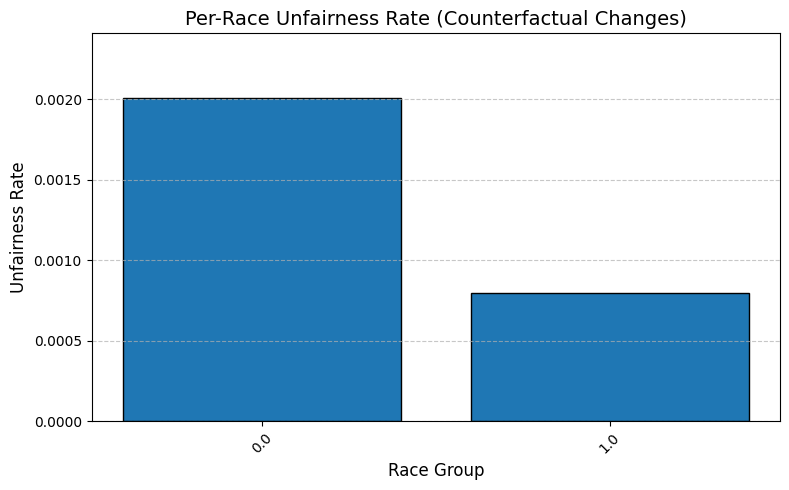

In [ ]:
plot_unfairness_per_race(df_race_unfairness)


PermutationExplainer explainer: 69268it [34:53, 32.98it/s]                           
<ipython-input-48-3f2c0c514fc4>:10: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test_dir, plot_type="bar")


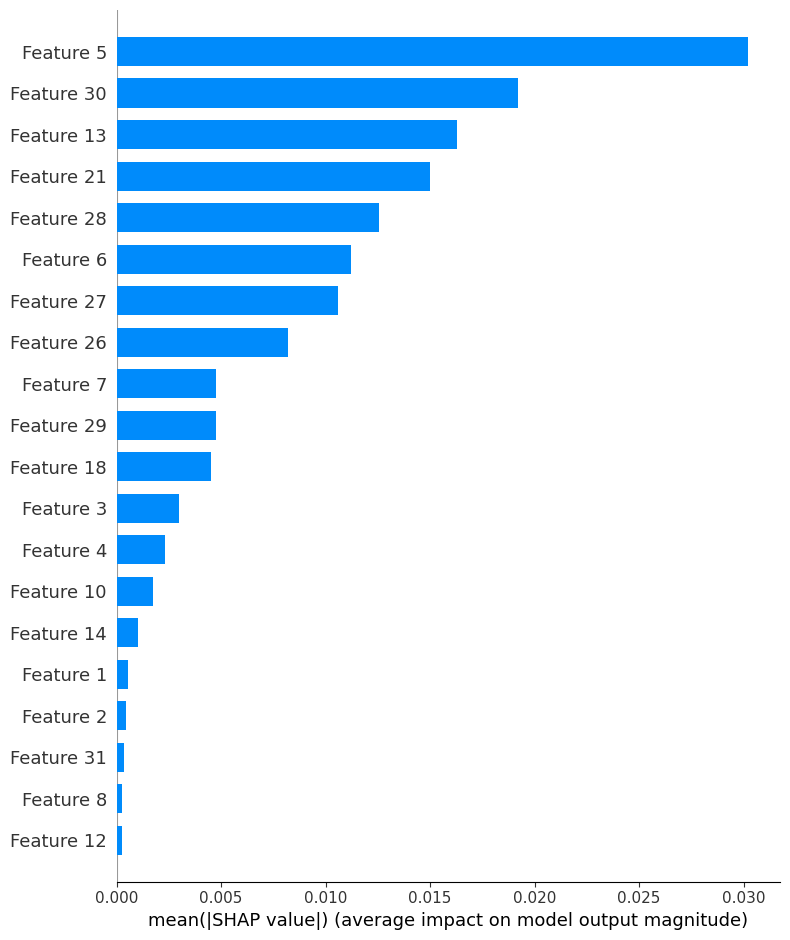

<ipython-input-48-3f2c0c514fc4>:13: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test_dir)


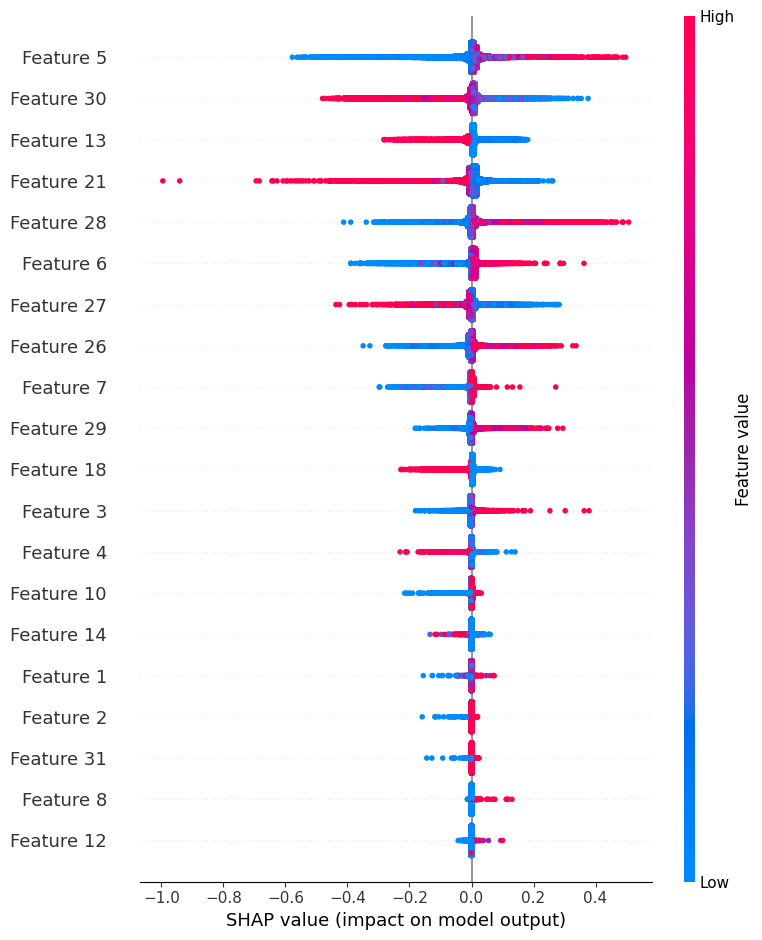

ValueError: Could not find feature named: loan_amount

In [ ]:
import shap

# ExponentiatedGradient is a wrapper, so we use expgrad_model.predict
explainer = shap.Explainer(expgrad_model.predict, X_test_dir)

# Compute SHAP values
shap_values = explainer(X_test_dir)

# 1. Summary plot (global feature importance)
shap.summary_plot(shap_values, X_test_dir, plot_type="bar")

# 2. Beeswarm plot (individual + global feature impacts)
shap.summary_plot(shap_values, X_test_dir)

# 3. Force plot (single prediction explanation)
sample_idx = 0  # Pick sample
sample_features = (
    X_test_dir.iloc[sample_idx, :]
    if isinstance(X_test_dir, pd.DataFrame)
    else pd.Series(X_test_dir[sample_idx, :])
)

shap.force_plot(
    shap_values.base_values[sample_idx],
    shap_values.values[sample_idx],
    sample_features
)

# 4. Dependence plot (feature-wise impact)
shap.dependence_plot(
    "loan_amount", shap_values.values, X_test_dir
)


In [ ]:
num_columns = train_df.shape[1]
print(num_columns)


33


In [ ]:
# Assuming 'test_df' is your original DataFrame
column_names = test_df.drop(columns=["loan_approved", "derived_race"]).columns.tolist()

# Create a DataFrame that maps 'Feature 1', 'Feature 2', ... to the corresponding feature names
feature_mapping = pd.DataFrame({
    'Feature': [f'Feature {i+1}' for i in range(len(column_names))],
    'Feature Name': column_names
})

# Display the table
print(feature_mapping)


       Feature                              Feature Name
0    Feature 1                               derived_sex
1    Feature 2                         derived_ethnicity
2    Feature 3                                    income
3    Feature 4               applicant_credit_score_type
4    Feature 5                               loan_amount
5    Feature 6                       loan_to_value_ratio
6    Feature 7                                 loan_term
7    Feature 8                            occupancy_type
8    Feature 9                               preapproval
9   Feature 10                   open-end_line_of_credit
10  Feature 11            business_or_commercial_purpose
11  Feature 12                                 loan_type
12  Feature 13                              loan_purpose
13  Feature 14                 derived_loan_product_type
14  Feature 15                 derived_dwelling_category
15  Feature 16                               lien_status
16  Feature 17                 

In [ ]:
# ------------------ Import Libraries ------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from aif360.datasets import BinaryLabelDataset
from aif360.algorithms.preprocessing import DisparateImpactRemover
from aif360.metrics import ClassificationMetric
from fairlearn.reductions import ExponentiatedGradient, DemographicParity

# ------------------ Load and Prepare Data ------------------
# Assuming 'new_data' is already loaded
X = new_data.drop(columns=["loan_approved"])
y = new_data["loan_approved"]
prot_attr = new_data["derived_race"]  # protected attribute

# Train-test split
X_train, X_test, y_train, y_test, prot_train, prot_test = train_test_split(
    X, y, prot_attr, stratify=y, test_size=0.3, random_state=42
)

# ------------------ Wrap into BinaryLabelDataset ------------------
train_df = X_train.copy()
train_df['loan_approved'] = y_train.values
train_df['derived_race'] = prot_train.values

train_bld = BinaryLabelDataset(
    df=train_df,
    label_names=["loan_approved"],
    protected_attribute_names=["derived_race"],
    favorable_label=1,
    unfavorable_label=0
)

test_df = X_test.copy()
test_df['loan_approved'] = y_test.values
test_df['derived_race'] = prot_test.values

test_bld = BinaryLabelDataset(
    df=test_df,
    label_names=["loan_approved"],
    protected_attribute_names=["derived_race"],
    favorable_label=1,
    unfavorable_label=0
)

# ------------------ Preprocessing: Disparate Impact Remover ------------------
print("\n🛠 Applying Disparate Impact Remover (gentler repair)...")
dir_repairer = DisparateImpactRemover(repair_level=0.7)
train_bld_repaired = dir_repairer.fit_transform(train_bld)

X_train_dir = train_bld_repaired.features
y_train_dir = train_bld_repaired.labels.ravel()
prot_train_dir = train_bld_repaired.protected_attributes.ravel()

# Test set stays original (for fairness evaluation)
X_test_dir = test_bld.features
y_test_dir = test_bld.labels.ravel()
prot_test_dir = test_bld.protected_attributes.ravel()

# ------------------ Exponentiated Gradient Training ------------------
print("\n🔵 Training ExponentiatedGradient with RandomForest...")

base_estimator = RandomForestClassifier(
    n_estimators=100,
    max_depth=6,
    random_state=42,
    class_weight='balanced'
)

constraint = DemographicParity()

expgrad_model = ExponentiatedGradient(
    base_estimator, constraints=constraint, eps=0.05
)

expgrad_model.fit(
    X_train_dir, y_train_dir, sensitive_features=prot_train_dir
)

# ------------------ Predictions ------------------
preds = expgrad_model.predict(X_test_dir)

# ------------------ Evaluation: Classification Metrics ------------------
print("\n🧮 Classification Report:")
print(classification_report(y_test_dir, preds))

print("\n🧮 Confusion Matrix:")
print(confusion_matrix(y_test_dir, preds))

# ------------------ Evaluation: Fairness Metrics ------------------
print("\n🧮 Fairness Metrics:")

pred_bld = test_bld.copy()
pred_bld.labels = preds.reshape(-1, 1)

metric = ClassificationMetric(
    test_bld,
    pred_bld,
    privileged_groups=[{'derived_race': 1}],
    unprivileged_groups=[{'derived_race': 0}]
)

results = {
    "Accuracy": accuracy_score(y_test_dir, preds),
    "Disparate Impact (DI)": metric.disparate_impact(),
    "Statistical Parity Difference (SPD)": metric.statistical_parity_difference(),
    "Equal Opportunity Difference (EOD)": metric.equal_opportunity_difference(),
    "Average Odds Difference (AOD)": metric.average_odds_difference()
}

print(pd.DataFrame([results]))




🛠 Applying Disparate Impact Remover (gentler repair)...

🔵 Training ExponentiatedGradient with RandomForest...

🧮 Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91     15067
         1.0       0.98      0.96      0.97     54200

    accuracy                           0.96     69267
   macro avg       0.93      0.95      0.94     69267
weighted avg       0.96      0.96      0.96     69267


🧮 Confusion Matrix:
[[14227   840]
 [ 1989 52211]]

🧮 Fairness Metrics:
   Accuracy  Disparate Impact (DI)  Statistical Parity Difference (SPD)  \
0  0.959158               0.934929                            -0.050142   

   Equal Opportunity Difference (EOD)  Average Odds Difference (AOD)  
0                            0.012061                        0.15909  
